In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set();

In [2]:
!pip3 install scikit-image

     |████████████████████████████████| 13.9 MB 290 kB/s            
     |████████████████████████████████| 208 kB 323 kB/s            
     |████████████████████████████████| 2.0 MB 394 kB/s            
     |████████████████████████████████| 6.8 MB 224 kB/s            
     |████████████████████████████████| 3.4 MB 199 kB/s            
You should consider upgrading via the '/home/sergey/PycharmProjects/ data_analistics/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
from skimage import data, color, feature
import skimage.data

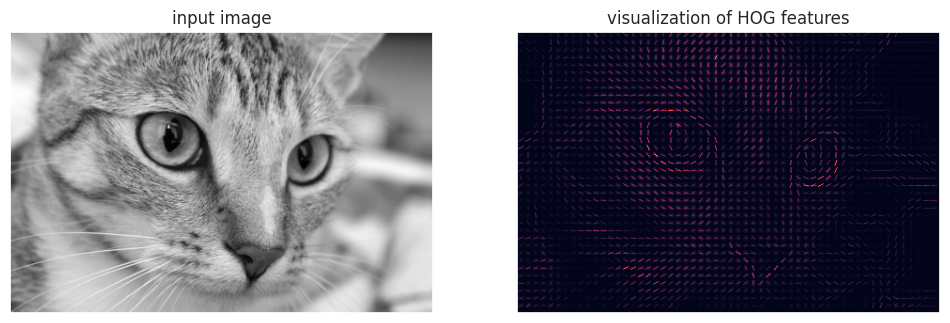

In [4]:
image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

# Plotting

fig, ax = plt.subplots(1, 2, figsize=(12, 6), 
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [5]:
from sklearn.datasets import fetch_lfw_people

In [6]:
faces = fetch_lfw_people()

In [7]:
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [41]:
from skimage import data, transform

In [47]:
imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']

images = [color.rgb2gray(getAttribute(data, name)())
          for name in imgs_to_use]

ValueError: the input array must have size 3 along `channel_axis`, got (512, 512)

In [ ]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches=extractor.transform(img[np.newaxis])
    
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
        
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale) 
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

In [ ]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off');

In [ ]:
from itertools import chain

X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] == 1

X_train.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchSV

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
model = grid.best_estimator_
model.fit(X_train, y_train)

In [ ]:
# etc. code not working
# for future refractoring